In [1]:
# Import relavant libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [2]:
#Upload total suspended solids raw data
# values are in grams
filename = 'tss.csv'
df = pd.read_csv(filename)
df.head() 

,Sample,Initial,Final
0,1,1.3395,1.3656
1,2,1.0771,1.0791
2,3,1.0826,1.0849
3,4,1.0933,1.0962
4,5,1.0848,1.0866


In [3]:
#upload sample number and volume data that match for each sample
filename = 'Filter_Map.csv'
fmap = pd.read_csv(filename)
fmap.head() 

,Sample,Volume,Description,Tube,Position
0,25,24.0,Initial Rinse,6,--
1,20,22.0,Initial Rinse,7,--
2,11,25.0,Initial Rinse,8,--
3,17,21.5,Initial Rinse,9,--
4,10,21.0,Initial Rinse,10,--


In [4]:
#combine the raw data with the sample map
df2=pd.merge(df,fmap,how='left', on='Sample')
df2.head()

,Sample,Initial,Final,Volume,Description,Tube,Position
0,1,1.3395,1.3656,53.0,Final Rinse,9,--
1,2,1.0771,1.0791,150.0,Whole Sample,8,Top
2,3,1.0826,1.0849,150.0,Whole Sample,9,Top
3,4,1.0933,1.0962,152.0,Whole Sample,6,Bottom
4,5,1.0848,1.0866,150.0,Initial Sample,10,Bottom


In [5]:
#calculate the concentration for each sample
df2['Conc']=(df2['Final']-df2['Initial'])/df2['Volume']

In [6]:
#Set up definitions to extract difference between top and bottom
def des(dd,description):
    df_type=dd[dd['Description']==description]
    return df_type;  
def tube(dd,description,number):
    df_type=des(dd,description)
    exp_u=df_type[df_type['Tube']==number]
    return exp_u;
def diff(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    red=bottom.iloc[0].Conc-top.iloc[0].Conc
    per=red/bottom.iloc[0].Conc
    return per 
   

In [39]:
dr1=des(df2,'Initial Sample')
print(dr1)

    Sample  Initial   Final  Volume     Description  Tube Position      Conc
4        5   1.0848  1.0866   150.0  Initial Sample    10   Bottom  0.000012
11      12   1.3406  1.3424   152.0  Initial Sample    10      Top  0.000012
13      14   1.3439  1.3456   162.0  Initial Sample     8   Bottom  0.000010
14      15   1.0852  1.0866   149.0  Initial Sample     7      Top  0.000009
15      16   1.0924  1.0941   159.0  Initial Sample     9   Bottom  0.000011
18      19   1.3438  1.3454   164.0  Initial Sample     9      Top  0.000010
20      21   1.0973  1.0993   150.0  Initial Sample     7   Bottom  0.000013
23      24   1.3400  1.3420   151.0  Initial Sample     8      Top  0.000013
27      28   1.1100  1.1116   152.0  Initial Sample     6      Top  0.000011
28      29   1.3414  1.3434   152.0  Initial Sample     6   Bottom  0.000013


In [8]:
#set up definition to create table of whole and inital sample differences 
df_filt=pd.DataFrame({'Tube': [6,7,8,9,10]})

def chart(dd,Description):
    df_filt[Description]=[diff(dd,Description, 6),diff(dd,Description, 7),diff(dd,Description, 8),diff(dd,Description, 9),diff(dd,Description, 10),]
    return df_filt

In [9]:
#Create table of whole and initial samples
xs=chart(df2,'Whole Sample')
xs=chart(df2,'Initial Sample')
print(xs)

   Tube  Whole Sample  Initial Sample
0     6      0.275862        0.200000
1     7     -0.455215        0.295302
2     8     -0.250000       -0.262174
3     9     -0.277778        0.087518
4    10      0.051776        0.013158


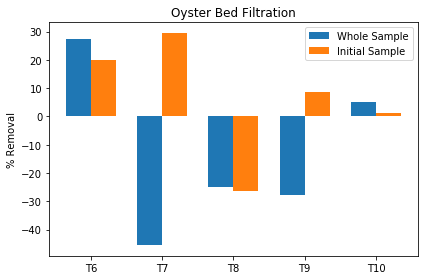

In [10]:
## create bar chart to show differences

labels = ['T6', 'T7', 'T8', 'T9', 'T10']
whole = xs['Whole Sample']*100
initial = xs['Initial Sample']*100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, whole, width, label='Whole Sample')
rects2 = ax.bar(x + width/2, initial, width, label='Initial Sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Removal')
ax.set_title('Oyster Bed Filtration')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig('filtration.png')

In [11]:
## what are the rinse differences


In [12]:
#set up rinse difference definitions 
def conc(dd,Description,number):
    c=tube(dd,Description,number)
    c2=c['Conc'].iloc[0]
    return c2
   
df_rns=pd.DataFrame({'Tube': [6,7,8,9,10]})
df_ac=pd.DataFrame({'Tube': [6,7,8,9,10]})
    
def rinse(dd,Description):
    df_rns[Description]=[conc(dd,Description, 6),conc(dd,Description, 7),conc(dd,Description, 8),conc(dd,Description, 9),conc(dd,Description, 10),]
    return df_rns


In [13]:
## Need to convert to how much was occupying space within oysters
## convert into accumulation rate

In [14]:
xq=rinse(df2,'Final Rinse')
xq=rinse(df2,'Initial Rinse')
xq['Diff']=xq['Final Rinse']-xq['Initial Rinse']
print(xq)

   Tube  Final Rinse  Initial Rinse      Diff
0     6     0.000483       0.000475  0.000008
1     7     0.000418       0.000277  0.000141
2     8     0.000459       0.000188  0.000271
3     9     0.000492       0.000349  0.000144
4    10     0.000407       0.000324  0.000084


In [15]:
## Is there a difference in Initial and Final? Is there a difference in each of the tubes?

In [16]:
# filename ='VSS.csv'
# dfv= pd.read_csv(filename)
# dfv.head()

In [17]:
# vss_sorted=dfv.sort_values('Wieght')
# vss_sorted=vss_sorted.reset_index(drop=True)
# vss_sorted.head()

In [18]:
# dfi=df2.copy()
# dfi=dfi.sort_values('Final')
# dfi=dfi.reset_index(drop=True)
# dfi.head()

In [19]:
# dfi['vss_sorted']=vss_sorted
# dfi['VSS']=(dfi['Final']-dfi['vss_sorted'])/dfi['Volume']
# print(dfi)

In [20]:
# def diff_VSS(dd,description,number):
#     exp_u=tube(dd,description,number)
#     top=exp_u[exp_u['Position']=='Top']
#     bottom=exp_u[exp_u['Position']=='Bottom']
#     red=bottom.iloc[0].VSS-top.iloc[0].VSS
#     per=red/bottom.iloc[0].VSS
#     return per 
# def chart_VSS(dd,Description):
#     df_filt[Description]=[diff_VSS(dd,Description, 6),diff_VSS(dd,Description, 7),diff_VSS(dd,Description, 8),diff_VSS(dd,Description, 9),diff_VSS(dd,Description, 10),]
#     return df_filt

In [21]:
# dx=chart_VSS(dfi,"Initial Sample")
# dx=chart_VSS(dfi,'Whole Sample')
# print(dx)

## Analyze Pressure

In [22]:
filename = 'pressure.csv'
df3 = pd.read_csv(filename)
df3

,Time,6p,6bh,7p,7bh,8p,8bh,9p,9bh,10p,10bh
0,0,35,280,40,273,42,280,NaN,NaN,NaN,NaN
1,23,40,280,42,275,44,279,44.0,265.0,40.0,285.0
2,57,49,283,44,273,46,283,49.0,270.0,44.0,295.0
3,86,48,283,39,265,45,284,47.0,275.0,49.0,282.0
4,135,49,275,42,273,48,280,40.0,270.0,47.0,293.0
5,190,47,283,42,270,47,283,40.0,263.0,47.0,283.0
6,270,46,270,44,273,45,277,47.0,260.0,52.0,280.0


In [23]:
df_pr=pd.DataFrame([df3['6p'],df3['7p'],df3['8p'],df3['9p'],df3['10p']]).T
df_bh=pd.DataFrame([df3['6bh'],df3['7bh'],df3['8bh'],df3['9bh'],df3['10bh']]).T
df_bh

,6bh,7bh,8bh,9bh,10bh
0,280.0,273.0,280.0,NaN,NaN
1,280.0,275.0,279.0,265.0,285.0
2,283.0,273.0,283.0,270.0,295.0
3,283.0,265.0,284.0,275.0,282.0
4,275.0,273.0,280.0,270.0,293.0
5,283.0,270.0,283.0,263.0,283.0
6,270.0,273.0,277.0,260.0,280.0


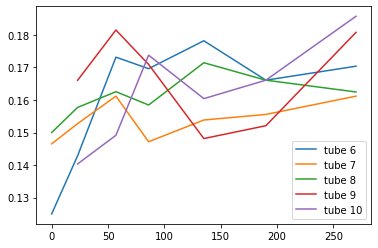

In [24]:
plt.plot(df3['Time'],df_pr['6p']/df_bh['6bh'],label='tube 6')
plt.plot(df3['Time'],df_pr['7p']/df_bh['7bh'],label='tube 7')
plt.plot(df3['Time'],df_pr['8p']/df_bh['8bh'],label='tube 8')
plt.plot(df3['Time'],df_pr['9p']/df_bh['9bh'],label='tube 9')
plt.plot(df3['Time'],df_pr['10p']/df_bh['10bh'],label='tube 10')
plt.legend(loc=0)

In [25]:
### Is there a trend, Is it different from one another? pressure drop over length, how does this compare to previous work?

## be sure to correct for salinity.

## Rinse data

In [26]:
## what are the rinse differences


In [27]:
#set up rinse difference definitions 
def conc(dd,Description,number):
    c=tube(dd,Description,number)
    c2=c['Conc'].iloc[0]
    return c2
   
df_rns=pd.DataFrame({'Tube': [6,7,8,9,10]})
df_ac=pd.DataFrame({'Tube': [6,7,8,9,10]})
    
def rinse(dd,Description):
    df_rns[Description]=[conc(dd,Description, 6),conc(dd,Description, 7),conc(dd,Description, 8),conc(dd,Description, 9),conc(dd,Description, 10),]
    return df_rns


In [28]:
## Need to convert to how much was occupying space within oysters
## convert into accumulation rate

In [29]:
## concentrations are in g/ml
cc=tube(df2,'Final Rinse',6)
cc

,Sample,Initial,Final,Volume,Description,Tube,Position,Conc
21,22,1.3452,1.3563,23.0,Final Rinse,6,--,0.000483


In [30]:
xq=rinse(df2,'Final Rinse')
xq=rinse(df2,'Initial Rinse')
xq['Diff']=xq['Final Rinse']-xq['Initial Rinse']
print(xq)

   Tube  Final Rinse  Initial Rinse      Diff
0     6     0.000483       0.000475  0.000008
1     7     0.000418       0.000277  0.000141
2     8     0.000459       0.000188  0.000271
3     9     0.000492       0.000349  0.000144
4    10     0.000407       0.000324  0.000084


In [31]:
## calculate the average bed hieght of the oysters (mm)
xq['Bed Hieght']=[df_bh['6bh'].mean(),df_bh['7bh'].mean(),df_bh['8bh'].mean(),df_bh['9bh'].mean(),df_bh['10bh'].mean()]
print(xq)

   Tube  Final Rinse  Initial Rinse      Diff  Bed Hieght
0     6     0.000483       0.000475  0.000008  279.142857
1     7     0.000418       0.000277  0.000141  271.714286
2     8     0.000459       0.000188  0.000271  280.857143
3     9     0.000492       0.000349  0.000144  267.166667
4    10     0.000407       0.000324  0.000084  286.333333


In [32]:
# one cup of oysters (236.588 ml) and 2 cups (473.176 ml) of tap water were placed into measuring cup and mixed
# calculate how much sediment accumulated
xq['Bed Vol']=xq['Bed Hieght']/10*np.pi*np.square(2.54) #calculate bed volume (cm3 or mL)
xq['Sed']=xq['Diff']*473.176/236.588 # sediment accumulated in g/mL of oysters
xq['Bed Sed']=xq['Bed Vol']*xq['Sed']# sedimentation in whole bed of oysters g
xq['Rate']=xq['Bed Sed']*1000/5.25 # sedimentation rate in mg/hr

print(xq)

   Tube  Final Rinse  Initial Rinse      Diff  Bed Hieght     Bed Vol  \
0     6     0.000483       0.000475  0.000008  279.142857  565.775094   
1     7     0.000418       0.000277  0.000141  271.714286  550.718643   
2     8     0.000459       0.000188  0.000271  280.857143  569.249659   
3     9     0.000492       0.000349  0.000144  267.166667  541.501393   
4    10     0.000407       0.000324  0.000084  286.333333  580.348966   

        Sed   Bed Sed       Rate  
0  0.000015  0.008610   1.639928  
1  0.000282  0.155203  29.562386  
2  0.000542  0.308637  58.787965  
3  0.000287  0.155536  29.625927  
4  0.000167  0.097032  18.482265  


# Filtered amount from the bed

In [33]:
#0.5 gpm flow rate = 31.5 ml/s
#multiply the flow rate x conc = sed flow rate mg/s
# mass balance of sediment sed_in - sedimentation - filtration = sed_out

In [34]:
def sed_conc(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    top_conc=top.iloc[0].Conc
    bottom_conc=bottom.iloc[0].Conc
    return bottom_conc
   
df_cc=pd.DataFrame({'Tube': [6,7,8,9,10]})
    
def sedcomp(dd,Description):
    df_cc=[sed_conc(dd,Description, 6),sed_conc(dd,Description, 7),sed_conc(dd,Description, 8),sed_conc(dd,Description, 9),sed_conc(dd,Description, 10),]
    return df_cc

In [35]:
ws_conc=sedcomp(df2,'Whole Sample')

print(ws_conc)

[1.9078947368421873e-05, 1.3907284768211859e-05, 1.0666666666666972e-05, 1.2000000000000158e-05, 1.4666666666666532e-05]


In [36]:
df_coc=df_cc
df_coc['bottom']=ws_conc

In [37]:
df_coc['sed flow']=df_coc['bottom']*31.5*60*60*1000 #mg/hr
# df_coc['sed max']=df_coc['sed flow']
df_coc['sed rate']=xq['Rate'] #mg/hr
df_coc['percent_ret']=df_coc['sed rate']/df_coc['sed flow']
print(df_coc)

   Tube    bottom     sed flow   sed rate  percent_ret
0     6  0.000019  2163.552632   1.639928     0.000758
1     7  0.000014  1577.086093  29.562386     0.018745
2     8  0.000011  1209.600000  58.787965     0.048601
3     9  0.000012  1360.800000  29.625927     0.021771
4    10  0.000015  1663.200000  18.482265     0.011112


In [38]:
print('mean=',df_coc['percent_ret'].mean(), 'st dev=',df_coc['percent_ret'].std() )

mean= 0.020197503619764613 st dev= 0.017831057060086985
